<a href="https://colab.research.google.com/github/ZahraBehzad/learn-CNN/blob/main/paperMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

در سلول پایین موارد زیر اضافه شد:

In the training phase, the ground truth images fXig
are prepared as fsubfsubc-pixel sub-images randomly
cropped from the training images. By “sub-images” we
mean these samples are treated as small “images” rather
than “patches”, in the sense that “patches” are overlapping
and require some averaging as post-processing but
“sub-images” need not. To synthesize the low-resolution
samples fYig, we blur a sub-image by a Gaussian kernel,
sub-sample it by the upscaling factor, and upscale it by
the same factor via bicubic interpolation.

In [ ]:
cd /content/drive/MyDrive/basicCNN/

/content/drive/MyDrive/basicCNN


In [ ]:
import os
from PIL import Image, ImageFilter
import random

# --- تنظیمات ---
INPUT_DIR = "91images"
OUTPUT_GT_BASE_DIR = "train_images/GT"
OUTPUT_LR_BASE_DIR = "train_images/LR"
SCALES = [2, 3, 4]
MIN_SIZE = 36
MAX_SIZE = 60

# --- اطمینان از وجود پوشه‌های خروجی ---
for scale in SCALES:
    os.makedirs(os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}"), exist_ok=True)
    os.makedirs(os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}"), exist_ok=True)

# --- تقسیم تصادفی تصویر به زیرتصویرهای غیرهمپوشان ---
def random_partition(image, min_subimage_size=36, max_subimage_size=60):
    width, height = image.size
    subimages = []
    regions = [(0, 0, width, height)]

    while regions:
        x, y, w, h = regions.pop()
        if w <= max_subimage_size and h <= max_subimage_size:
            subimages.append((x, y, w, h))
            continue

        split_vertical = random.choice([True, False]) if w > max_subimage_size else False
        split_horizontal = random.choice([True, False]) if h > max_subimage_size else False

        if split_vertical and w >= 2 * min_subimage_size:
            split_pos = random.randint(min_subimage_size, w - min_subimage_size)
            regions.append((x, y, split_pos, h))
            regions.append((x + split_pos, y, w - split_pos, h))
        elif split_horizontal and h >= 2 * min_subimage_size:
            split_pos = random.randint(min_subimage_size, h - min_subimage_size)
            regions.append((x, y, w, split_pos))
            regions.append((x, y + split_pos, w, h - split_pos))
        else:
            subimages.append((x, y, w, h))


    return subimages

# --- استخراج زیرتصویرها از یک عکس ---
def generate_subimages(image, min_size=36, max_size=60):
    partitions = random_partition(image, min_size, max_size)
    return [image.crop((x, y, x + w, y + h)) for x, y, w, h in partitions]

# --- پردازش زیرتصویرها: تولید نسخه‌های کم‌کیفیت با Gaussian blur و scale ---
def process_subimage(subimg, scales=[2,3,4], sigma_factor=0.5):
    results = []
    for scale in scales:
        w, h = subimg.size
        new_w = (w // scale) * scale
        new_h = (h // scale) * scale

        if new_w < scale or new_h < scale:
            continue

        cropped = subimg.crop((0, 0, new_w, new_h))
        sigma = sigma_factor * scale
        blurred = cropped.filter(ImageFilter.GaussianBlur(sigma))
        downsampled = blurred.resize((new_w // scale, new_h // scale), Image.BICUBIC)
        upscaled = downsampled.resize((new_w, new_h), Image.BICUBIC)
        results.append((scale, cropped, upscaled))  # cropped = GT, upscaled = LR
    return results

# --- اجرای اصلی ---
def main():
    image_files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(image_files)
    counter = 0
    for filename in image_files:
        image_path = os.path.join(INPUT_DIR, filename)
        try:
            image = Image.open(image_path).convert("RGB")
        except:
            print(f"خطا در باز کردن تصویر: {filename}")
            continue

        subimages = generate_subimages(image, MIN_SIZE, MAX_SIZE)

        for sub_idx, subimg in enumerate(subimages):
            results = process_subimage(subimg, SCALES)
            for scale, gt_img, lr_img in results:
                base_name = f"{os.path.splitext(filename)[0]}_sub{sub_idx}_x{scale}"

                # ذخیره GT
                gt_dir = os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}")
                gt_img.save(os.path.join(gt_dir, f"{base_name}_GT.png"))

                # ذخیره LR
                lr_dir = os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}")
                lr_img.save(os.path.join(lr_dir, f"{base_name}_LR.png"))

                counter += 1

    print(f"✅ پردازش کامل شد. {counter} نمونه ذخیره شد.")

if __name__ == "__main__":
    main()


['Copy of t2.png', 'Copy of t1.png', 'Copy of t5.png', 'Copy of t3.png', 'Copy of t51.png', 'Copy of t7.png', 'Copy of t6.png', 'Copy of t9.png', 'Copy of t8.png', 'Copy of t4.png', 'Copy of t14.png', 'Copy of t17.png', 'Copy of t11.png', 'Copy of t10.png', 'Copy of t15.png', 'Copy of t19.png', 'Copy of t12.png', 'Copy of t16.png', 'Copy of t18.png', 'Copy of t13.png', 'Copy of t27.png', 'Copy of t24.png', 'Copy of t26.png', 'Copy of t20.png', 'Copy of t21.png', 'Copy of t22.png', 'Copy of t29.png', 'Copy of t25.png', 'Copy of t23.png', 'Copy of t28.png', 'Copy of t38.png', 'Copy of t30.png', 'Copy of t32.png', 'Copy of t31.png', 'Copy of t35.png', 'Copy of t37.png', 'Copy of t34.png', 'Copy of t36.png', 'Copy of t39.png', 'Copy of t33.png', 'Copy of t46.png', 'Copy of t47.png', 'Copy of t44.png', 'Copy of t50.png', 'Copy of t40.png', 'Copy of t43.png', 'Copy of t42.png', 'Copy of t49.png', 'Copy of t45.png', 'Copy of t48.png', 'Copy of t53.png', 'Copy of t54.png', 'Copy of t52.png', '

Epoch 1/200
71/71 - 5s - 75ms/step - loss: 0.0211
Epoch 2/200
71/71 - 0s - 5ms/step - loss: 0.0069
Epoch 3/200
71/71 - 0s - 5ms/step - loss: 0.0073
Epoch 4/200
71/71 - 1s - 9ms/step - loss: 0.0074
Epoch 5/200
71/71 - 1s - 9ms/step - loss: 0.0079
Epoch 6/200
71/71 - 0s - 4ms/step - loss: 0.0076
Epoch 7/200
71/71 - 0s - 4ms/step - loss: 0.0060
Epoch 8/200
71/71 - 0s - 4ms/step - loss: 0.0067
Epoch 9/200
71/71 - 0s - 4ms/step - loss: 0.0066
Epoch 10/200
71/71 - 0s - 4ms/step - loss: 0.0065
Epoch 11/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 12/200
71/71 - 0s - 4ms/step - loss: 0.0060
Epoch 13/200
71/71 - 0s - 5ms/step - loss: 0.0063
Epoch 14/200
71/71 - 0s - 4ms/step - loss: 0.0063
Epoch 15/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 16/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 17/200
71/71 - 0s - 4ms/step - loss: 0.0057
Epoch 18/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 19/200
71/71 - 0s - 4ms/step - loss: 0.0061
Epoch 20/200
71/71 - 0s - 4ms/step - loss: 0.0068
Epoch 21

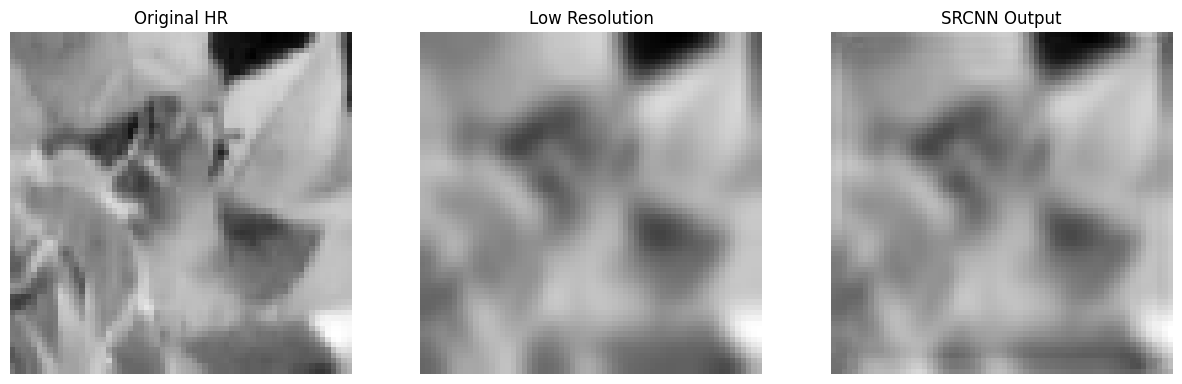

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize
from skimage.color import rgb2ycbcr, ycbcr2rgb

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    target_size = (64, 64)  # یا هر اندازه‌ای که برای آموزش مناسبه

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize کردن به سایز یکسان
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        x.append(lr_y)
        y.append(hr_y)

    x = np.expand_dims(np.array(x), -1)
    y = np.expand_dims(np.array(y), -1)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'  # تغییر بده به مسیر درست
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')  # فقط برای scale=2 در این مدل

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path)

# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)


# تست مدل روی یکی از تصاویر
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول پایین موارد زیر اضافه شد:

To avoid border effects during training, all the convolutional
layers have no padding, and the network
produces a smaller output ((fsub 􀀀f1 􀀀f2 􀀀f3 +3)2 c).
The MSE loss function is evaluated only by the difference
between the central pixels of Xi and the network output.

Epoch 1/200
120/120 - 5s - 38ms/step - loss: 0.0094
Epoch 2/200
120/120 - 2s - 16ms/step - loss: 0.0014
Epoch 3/200
120/120 - 0s - 3ms/step - loss: 0.0011
Epoch 4/200
120/120 - 1s - 5ms/step - loss: 9.7862e-04
Epoch 5/200
120/120 - 0s - 3ms/step - loss: 8.9864e-04
Epoch 6/200
120/120 - 0s - 3ms/step - loss: 9.4458e-04
Epoch 7/200
120/120 - 1s - 5ms/step - loss: 8.3804e-04
Epoch 8/200
120/120 - 1s - 6ms/step - loss: 8.0002e-04
Epoch 9/200
120/120 - 0s - 4ms/step - loss: 7.5320e-04
Epoch 10/200
120/120 - 1s - 5ms/step - loss: 7.2980e-04
Epoch 11/200
120/120 - 0s - 4ms/step - loss: 7.4920e-04
Epoch 12/200
120/120 - 1s - 5ms/step - loss: 8.6006e-04
Epoch 13/200
120/120 - 0s - 4ms/step - loss: 7.0470e-04
Epoch 14/200
120/120 - 0s - 3ms/step - loss: 7.3391e-04
Epoch 15/200
120/120 - 1s - 5ms/step - loss: 7.4837e-04
Epoch 16/200
120/120 - 0s - 3ms/step - loss: 7.3571e-04
Epoch 17/200
120/120 - 0s - 3ms/step - loss: 6.9098e-04
Epoch 18/200
120/120 - 0s - 3ms/step - loss: 7.3849e-04
Epoch 19/20

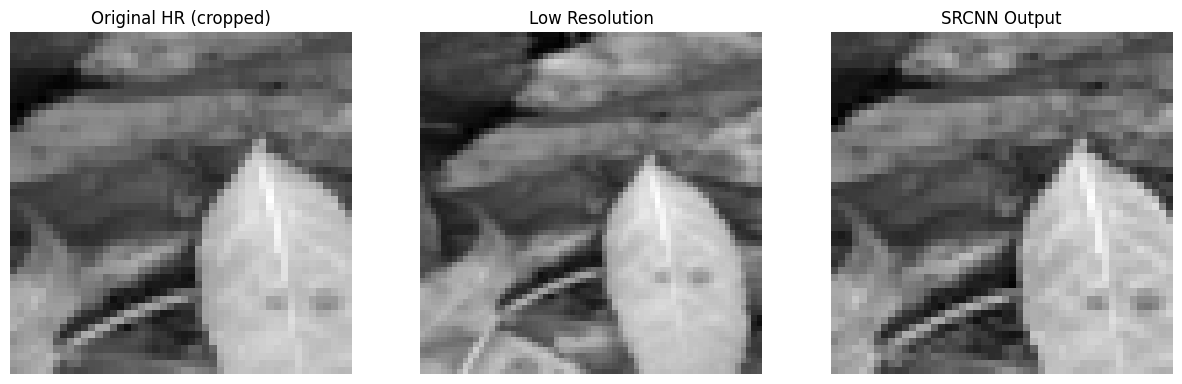

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول پایین موارد زیر اضافه شد:

The loss is minimized using stochastic gradient descent
with the standard backpropagation

Epoch 1/200
120/120 - 2s - 18ms/step - loss: 0.0508
Epoch 2/200
120/120 - 2s - 13ms/step - loss: 0.0049
Epoch 3/200
120/120 - 1s - 5ms/step - loss: 0.0047
Epoch 4/200
120/120 - 1s - 5ms/step - loss: 0.0046
Epoch 5/200
120/120 - 1s - 5ms/step - loss: 0.0044
Epoch 6/200
120/120 - 0s - 3ms/step - loss: 0.0043
Epoch 7/200
120/120 - 0s - 3ms/step - loss: 0.0042
Epoch 8/200
120/120 - 0s - 3ms/step - loss: 0.0041
Epoch 9/200
120/120 - 0s - 3ms/step - loss: 0.0040
Epoch 10/200
120/120 - 0s - 3ms/step - loss: 0.0039
Epoch 11/200
120/120 - 0s - 3ms/step - loss: 0.0038
Epoch 12/200
120/120 - 0s - 3ms/step - loss: 0.0038
Epoch 13/200
120/120 - 0s - 3ms/step - loss: 0.0037
Epoch 14/200
120/120 - 1s - 5ms/step - loss: 0.0036
Epoch 15/200
120/120 - 0s - 3ms/step - loss: 0.0035
Epoch 16/200
120/120 - 1s - 5ms/step - loss: 0.0035
Epoch 17/200
120/120 - 0s - 3ms/step - loss: 0.0034
Epoch 18/200
120/120 - 1s - 6ms/step - loss: 0.0034
Epoch 19/200
120/120 - 0s - 4ms/step - loss: 0.0033
Epoch 20/200
120/12

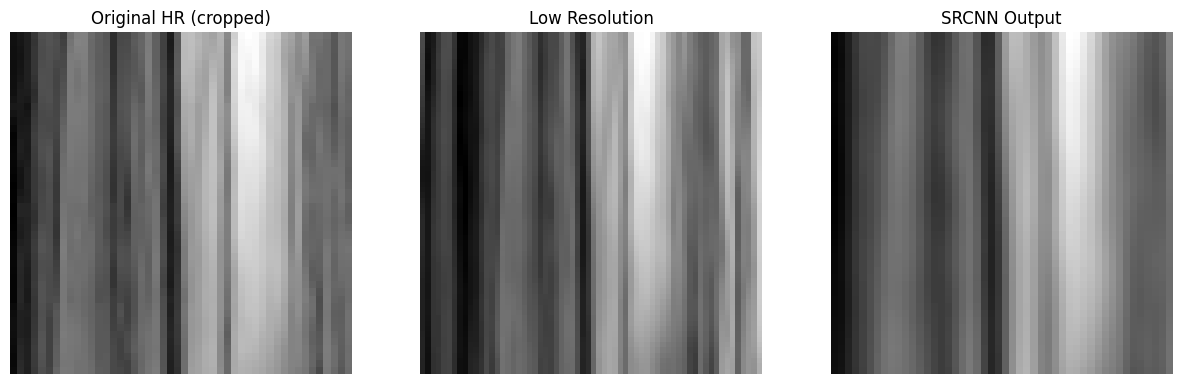

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

# تعریف optimizer مطابق مقاله
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')


# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول پایین موارد زیر اضافه شد:

The filter weights of each layer are initialized by drawing
randomly from a Gaussian distribution with zero mean
and standard deviation 0.001 (and 0 for biases). The
learning rate is 10􀀀4 for the first two layers, and 10􀀀5 for
the last layer. We empirically find that a smaller learning
rate in the last layer is important for the network to
converge (similar to the denoising case [22]).

Epoch 1/50
120/120 - 2s - 13ms/step - loss: 0.2655
Epoch 2/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 3/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 4/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 5/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 6/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 7/50
120/120 - 1s - 5ms/step - loss: 0.2654
Epoch 8/50
120/120 - 1s - 5ms/step - loss: 0.2653
Epoch 9/50
120/120 - 0s - 4ms/step - loss: 0.2653
Epoch 10/50
120/120 - 1s - 5ms/step - loss: 0.2653
Epoch 11/50
120/120 - 1s - 5ms/step - loss: 0.2653
Epoch 12/50
120/120 - 0s - 4ms/step - loss: 0.2653
Epoch 13/50
120/120 - 1s - 5ms/step - loss: 0.2652
Epoch 14/50
120/120 - 0s - 3ms/step - loss: 0.2652
Epoch 15/50
120/120 - 1s - 5ms/step - loss: 0.2652
Epoch 16/50
120/120 - 1s - 5ms/step - loss: 0.2652
Epoch 17/50
120/120 - 0s - 3ms/step - loss: 0.2652
Epoch 18/50
120/120 - 0s - 3ms/step - loss: 0.2652
Epoch 19/50
120/120 - 0s - 3ms/step - loss: 0.2651
Epoch 20/50
120/120 - 0s - 3ms/step - l

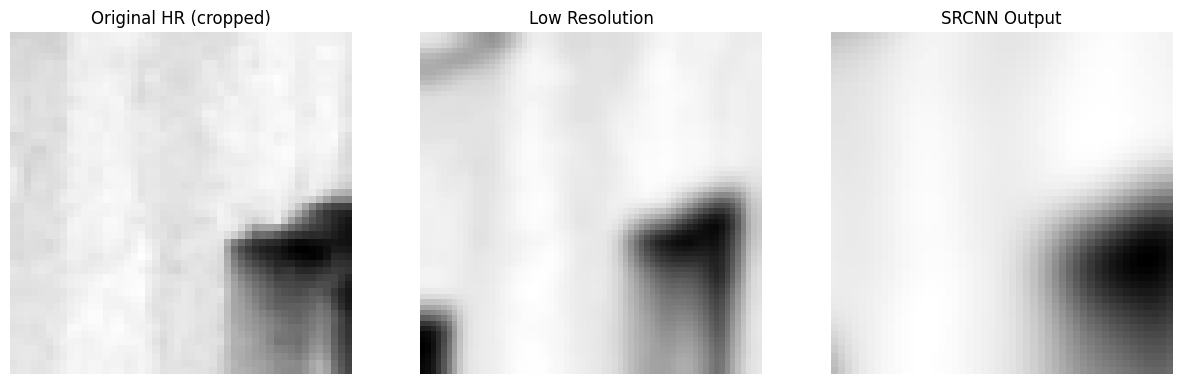

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

# ساخت مدل SRCNN با padding='valid' و مقداردهی اولیه خاص
conv1 = layers.Conv2D(64, (9, 9), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv1')

conv2 = layers.Conv2D(32, (5, 5), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv2')

conv3 = layers.Conv2D(1, (5, 5), activation='linear', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv3')

inputs = layers.Input(shape=(target_size[0], target_size[1], 1))
x = conv1(inputs)
x = conv2(x)
outputs = conv3(x)
model = models.Model(inputs, outputs)

# تنظیمات یادگیری مجزا
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')

# فریز موقت لایه‌ی آخر (warm-up)
model.get_layer('conv3').trainable = False

# آموزش اولیه فقط با دو لایه اول
model.fit(x_train, y_train, batch_size=4, epochs=50, verbose=2)

# فعال‌سازی مجدد لایه سوم
model.get_layer('conv3').trainable = True

# تعریف optimizer با نرخ یادگیری کمتر برای کل مدل
optimizer_fine = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(optimizer=optimizer_fine, loss='mse')

# آموزش نهایی مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)


# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول های زیر دیتاست تست رو هم اضافه کردم.
در پیش پردازش عکس های تست،عکس ها به چند قسمت تقسیم شدن

In [1]:
cd /content/drive/MyDrive/basicCNN/

/content/drive/MyDrive/basicCNN


In [ ]:
import os
from PIL import Image, ImageFilter
import random

# --- تنظیمات ---
INPUT_DIR = "Set5"
OUTPUT_GT_BASE_DIR = "test_set5_images/GT"
OUTPUT_LR_BASE_DIR = "test_set5_images/LR"
SCALES = [2, 3, 4]
MIN_SIZE = 36
MAX_SIZE = 60

# --- اطمینان از وجود پوشه‌های خروجی ---
for scale in SCALES:
    os.makedirs(os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}"), exist_ok=True)
    os.makedirs(os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}"), exist_ok=True)

# --- تقسیم تصادفی تصویر به زیرتصویرهای غیرهمپوشان ---
def random_partition(image, min_subimage_size=36, max_subimage_size=60):
    width, height = image.size
    subimages = []
    regions = [(0, 0, width, height)]

    while regions:
        x, y, w, h = regions.pop()
        if w <= max_subimage_size and h <= max_subimage_size:
            subimages.append((x, y, w, h))
            continue

        split_vertical = random.choice([True, False]) if w > max_subimage_size else False
        split_horizontal = random.choice([True, False]) if h > max_subimage_size else False

        if split_vertical and w >= 2 * min_subimage_size:
            split_pos = random.randint(min_subimage_size, w - min_subimage_size)
            regions.append((x, y, split_pos, h))
            regions.append((x + split_pos, y, w - split_pos, h))
        elif split_horizontal and h >= 2 * min_subimage_size:
            split_pos = random.randint(min_subimage_size, h - min_subimage_size)
            regions.append((x, y, w, split_pos))
            regions.append((x, y + split_pos, w, h - split_pos))
        else:
            subimages.append((x, y, w, h))


    return subimages

# --- استخراج زیرتصویرها از یک عکس ---
def generate_subimages(image, min_size=36, max_size=60):
    partitions = random_partition(image, min_size, max_size)
    return [image.crop((x, y, x + w, y + h)) for x, y, w, h in partitions]

# --- پردازش زیرتصویرها: تولید نسخه‌های کم‌کیفیت با Gaussian blur و scale ---
def process_subimage(subimg, scales=[2,3,4], sigma_factor=0.5):
    results = []
    for scale in scales:
        w, h = subimg.size
        new_w = (w // scale) * scale
        new_h = (h // scale) * scale

        if new_w < scale or new_h < scale:
            continue

        cropped = subimg.crop((0, 0, new_w, new_h))
        sigma = sigma_factor * scale
        blurred = cropped.filter(ImageFilter.GaussianBlur(sigma))
        downsampled = blurred.resize((new_w // scale, new_h // scale), Image.BICUBIC)
        upscaled = downsampled.resize((new_w, new_h), Image.BICUBIC)
        results.append((scale, cropped, upscaled))  # cropped = GT, upscaled = LR
    return results

# --- اجرای اصلی ---
def main():
    image_files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(image_files)
    counter = 0
    for filename in image_files:
        image_path = os.path.join(INPUT_DIR, filename)
        try:
            image = Image.open(image_path).convert("RGB")
        except:
            print(f"خطا در باز کردن تصویر: {filename}")
            continue

        subimages = generate_subimages(image, MIN_SIZE, MAX_SIZE)

        for sub_idx, subimg in enumerate(subimages):
            results = process_subimage(subimg, SCALES)
            for scale, gt_img, lr_img in results:
                base_name = f"{os.path.splitext(filename)[0]}_sub{sub_idx}_x{scale}"

                # ذخیره GT
                gt_dir = os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}")
                gt_img.save(os.path.join(gt_dir, f"{base_name}_GT.png"))

                # ذخیره LR
                lr_dir = os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}")
                lr_img.save(os.path.join(lr_dir, f"{base_name}_LR.png"))

                counter += 1

    print(f"✅ پردازش کامل شد. {counter} نمونه ذخیره شد.")

if __name__ == "__main__":
    main()


['baby.png', 'bird.png', 'head.png', 'woman.png', 'butterfly.png']
✅ پردازش کامل شد. 93 نمونه ذخیره شد.


Epoch 1/50
133/133 - 2s - 12ms/step - loss: 0.2735
Epoch 2/50
133/133 - 0s - 4ms/step - loss: 0.2735
Epoch 3/50
133/133 - 0s - 3ms/step - loss: 0.2735
Epoch 4/50
133/133 - 1s - 4ms/step - loss: 0.2734
Epoch 5/50
133/133 - 1s - 5ms/step - loss: 0.2734
Epoch 6/50
133/133 - 1s - 5ms/step - loss: 0.2734
Epoch 7/50
133/133 - 1s - 5ms/step - loss: 0.2734
Epoch 8/50
133/133 - 1s - 5ms/step - loss: 0.2733
Epoch 9/50
133/133 - 0s - 3ms/step - loss: 0.2733
Epoch 10/50
133/133 - 0s - 3ms/step - loss: 0.2733
Epoch 11/50
133/133 - 0s - 3ms/step - loss: 0.2732
Epoch 12/50
133/133 - 1s - 5ms/step - loss: 0.2732
Epoch 13/50
133/133 - 1s - 5ms/step - loss: 0.2732
Epoch 14/50
133/133 - 1s - 5ms/step - loss: 0.2731
Epoch 15/50
133/133 - 1s - 5ms/step - loss: 0.2731
Epoch 16/50
133/133 - 1s - 5ms/step - loss: 0.2731
Epoch 17/50
133/133 - 0s - 3ms/step - loss: 0.2730
Epoch 18/50
133/133 - 1s - 5ms/step - loss: 0.2730
Epoch 19/50
133/133 - 0s - 3ms/step - loss: 0.2729
Epoch 20/50
133/133 - 0s - 3ms/step - l

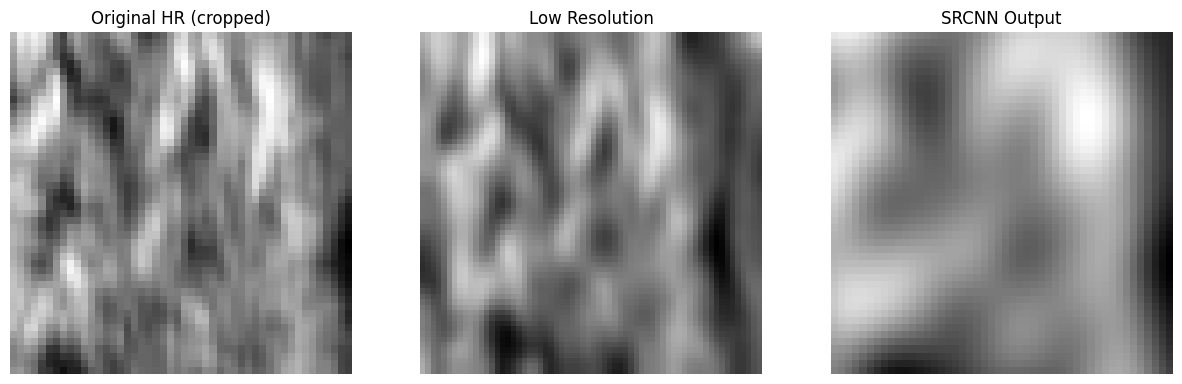


=== Average Metrics on Set5 ===
Average PSNR: 0.80
Average SSIM: 0.0186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
baby_sub10_x2_GT.png | PSNR: 27.18 | SSIM: 0.9552


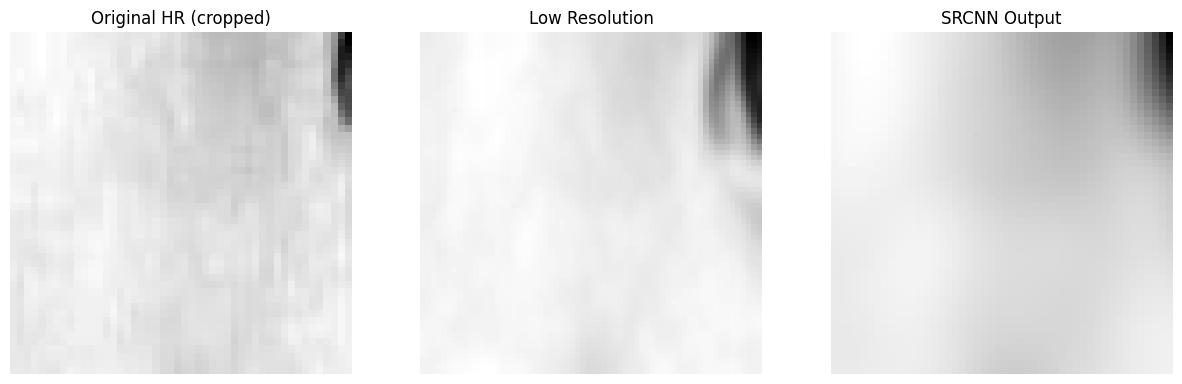


=== Average Metrics on Set5 ===
Average PSNR: 1.68
Average SSIM: 0.0494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
baby_sub11_x2_GT.png | PSNR: 29.04 | SSIM: 0.9598


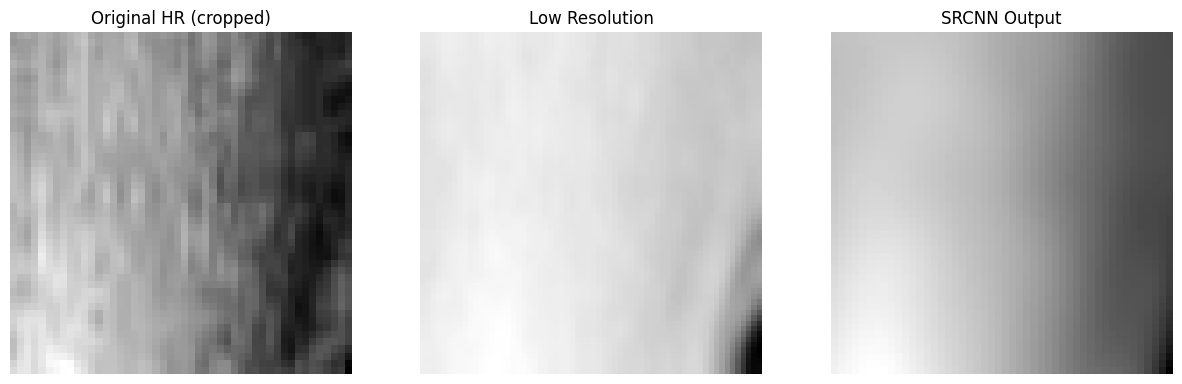


=== Average Metrics on Set5 ===
Average PSNR: 2.61
Average SSIM: 0.0803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
baby_sub12_x2_GT.png | PSNR: 28.41 | SSIM: 0.9669


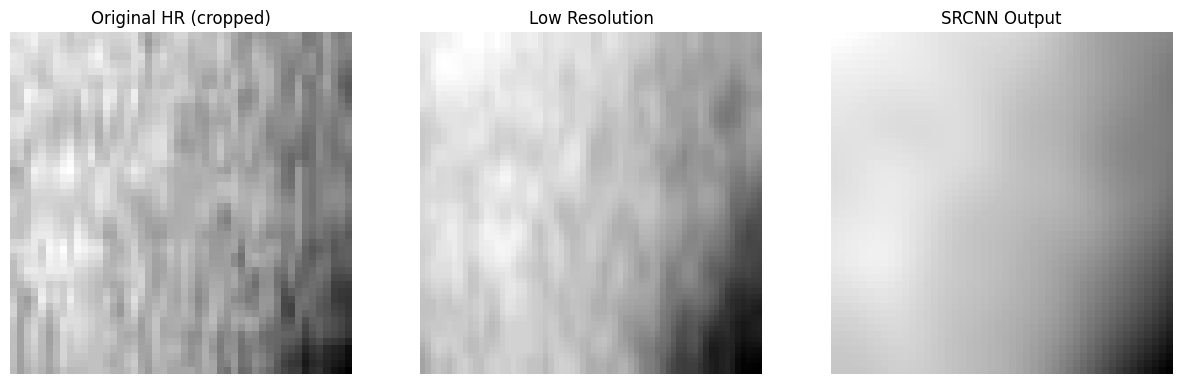


=== Average Metrics on Set5 ===
Average PSNR: 3.53
Average SSIM: 0.1115
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
baby_sub13_x2_GT.png | PSNR: 20.89 | SSIM: 0.3086


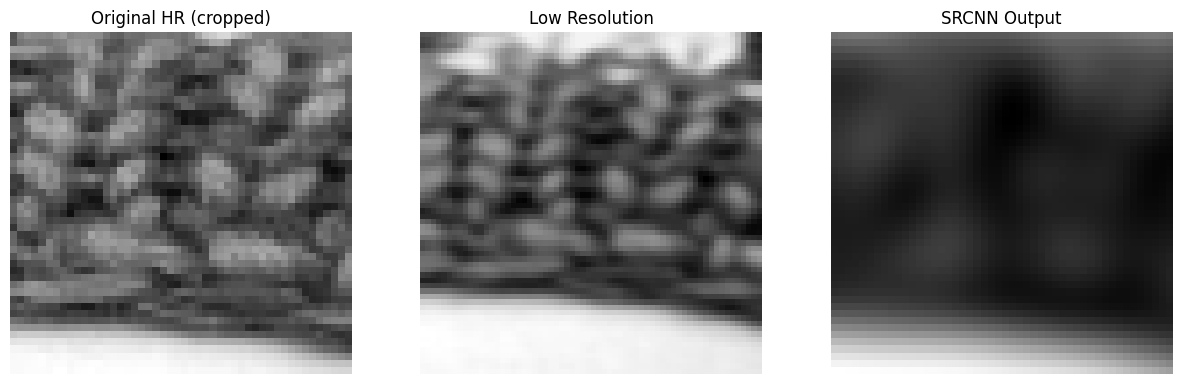


=== Average Metrics on Set5 ===
Average PSNR: 4.20
Average SSIM: 0.1215
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
baby_sub14_x2_GT.png | PSNR: 20.56 | SSIM: 0.4876


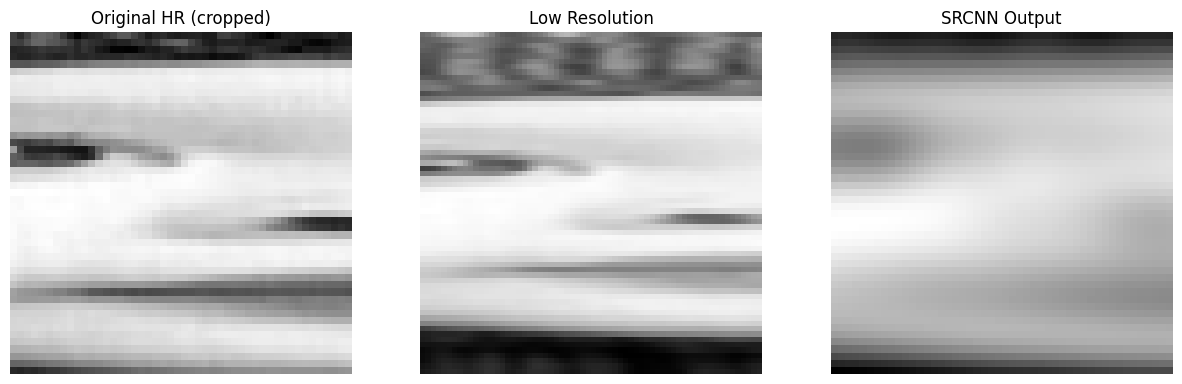


=== Average Metrics on Set5 ===
Average PSNR: 4.87
Average SSIM: 0.1372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
baby_sub15_x2_GT.png | PSNR: 20.62 | SSIM: 0.6448


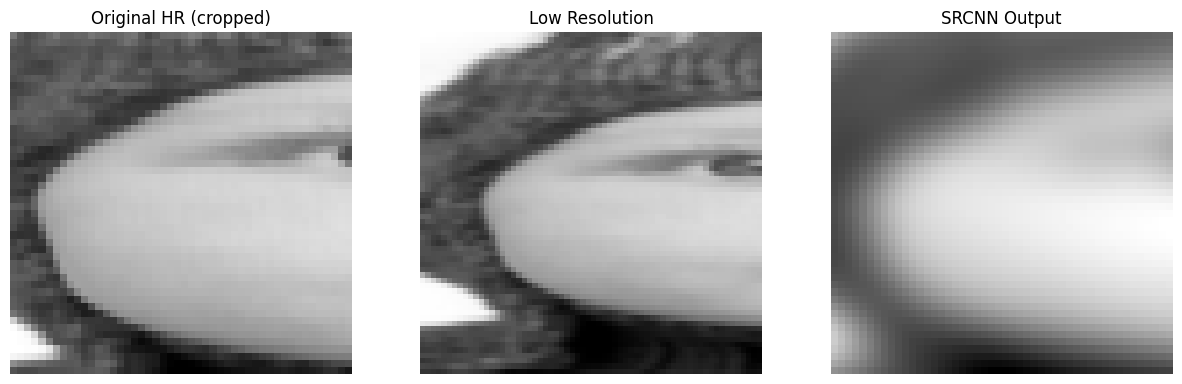


=== Average Metrics on Set5 ===
Average PSNR: 5.53
Average SSIM: 0.1580
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
baby_sub16_x2_GT.png | PSNR: 20.68 | SSIM: 0.8707


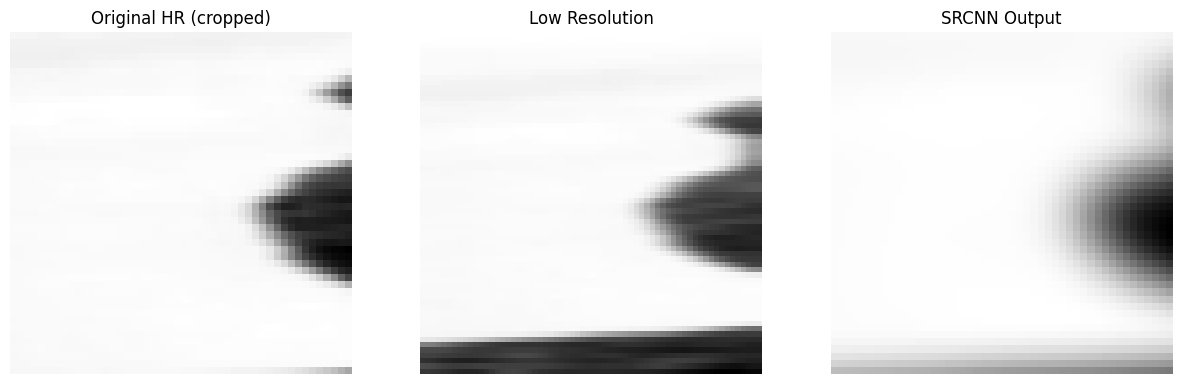


=== Average Metrics on Set5 ===
Average PSNR: 6.20
Average SSIM: 0.1861
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
baby_sub1_x2_GT.png | PSNR: 20.79 | SSIM: 0.7032


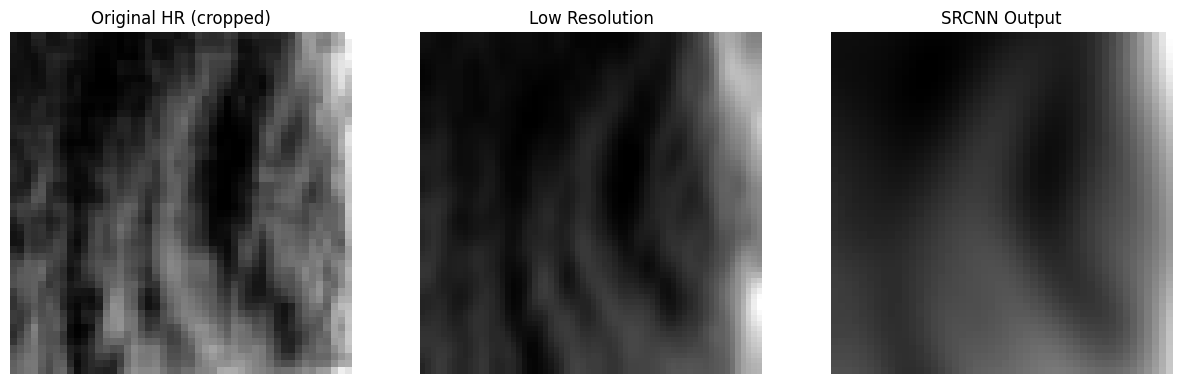


=== Average Metrics on Set5 ===
Average PSNR: 6.87
Average SSIM: 0.2088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
baby_sub2_x2_GT.png | PSNR: 21.09 | SSIM: 0.7289


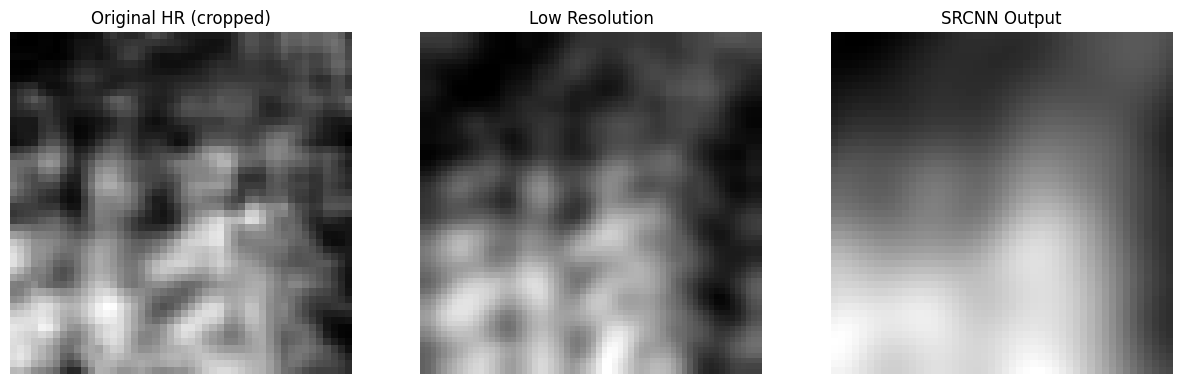


=== Average Metrics on Set5 ===
Average PSNR: 7.55
Average SSIM: 0.2323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
baby_sub3_x2_GT.png | PSNR: 21.45 | SSIM: 0.5594


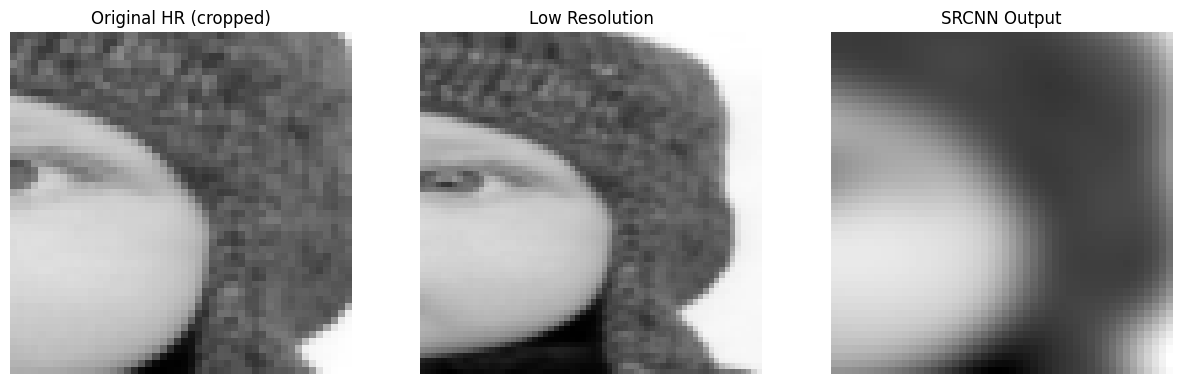


=== Average Metrics on Set5 ===
Average PSNR: 8.24
Average SSIM: 0.2503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
baby_sub4_x2_GT.png | PSNR: 22.98 | SSIM: 0.7870


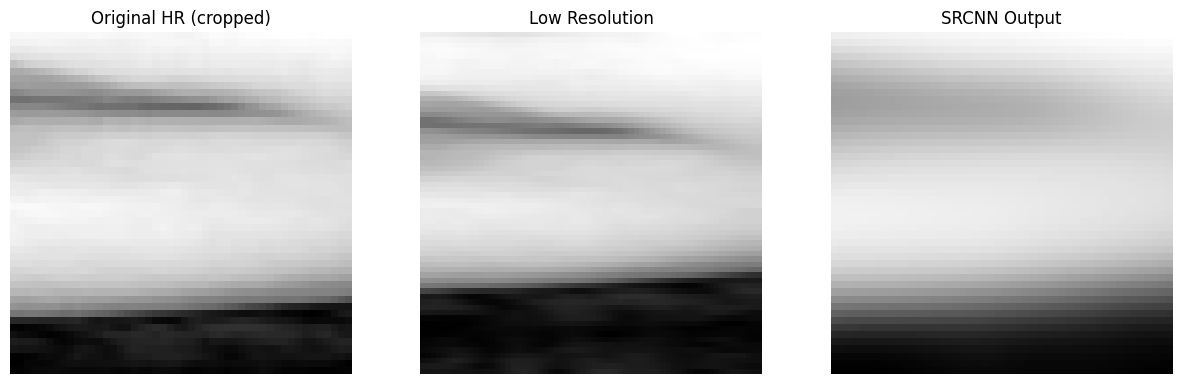


=== Average Metrics on Set5 ===
Average PSNR: 8.98
Average SSIM: 0.2757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
baby_sub5_x2_GT.png | PSNR: 22.31 | SSIM: 0.7865


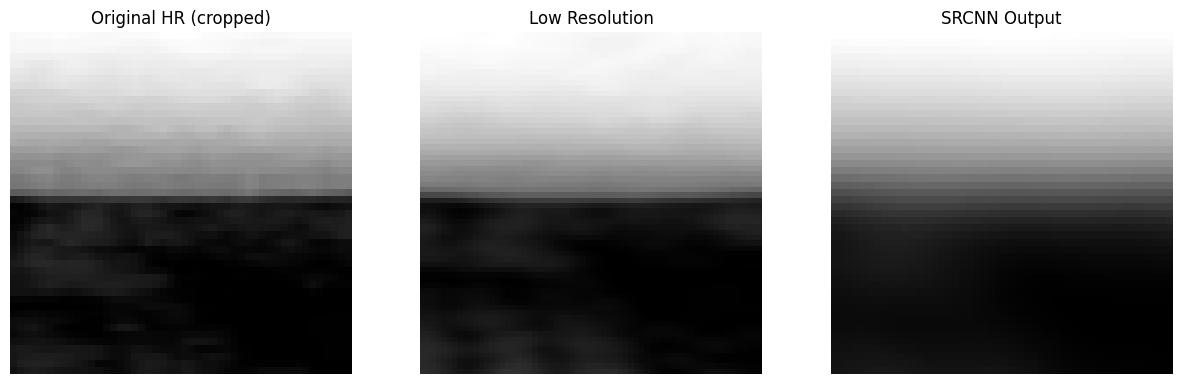


=== Average Metrics on Set5 ===
Average PSNR: 9.70
Average SSIM: 0.3011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
baby_sub6_x2_GT.png | PSNR: 29.50 | SSIM: 0.9738


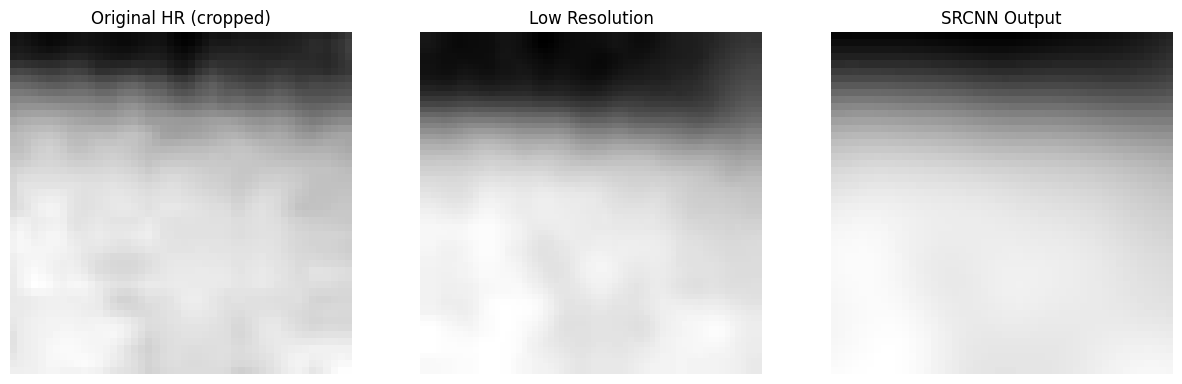


=== Average Metrics on Set5 ===
Average PSNR: 10.65
Average SSIM: 0.3325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
baby_sub7_x2_GT.png | PSNR: 27.55 | SSIM: 0.8066


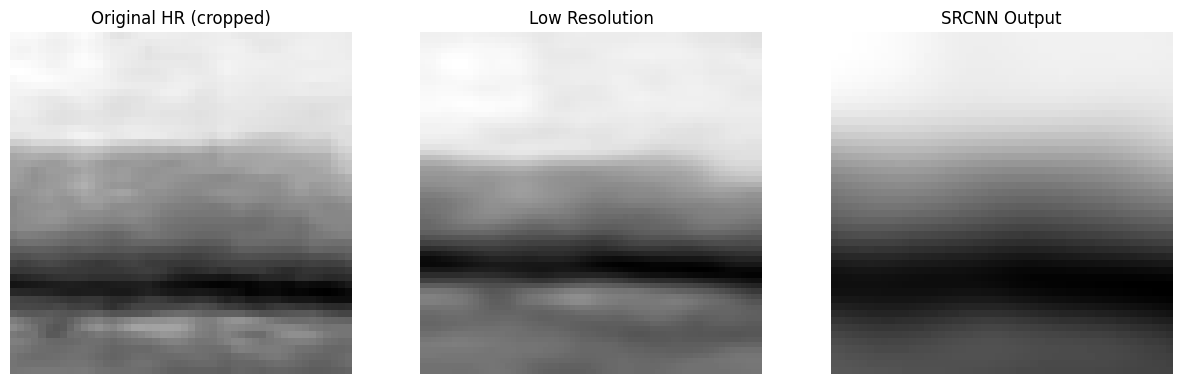


=== Average Metrics on Set5 ===
Average PSNR: 11.54
Average SSIM: 0.3585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
baby_sub8_x2_GT.png | PSNR: 28.54 | SSIM: 0.9581


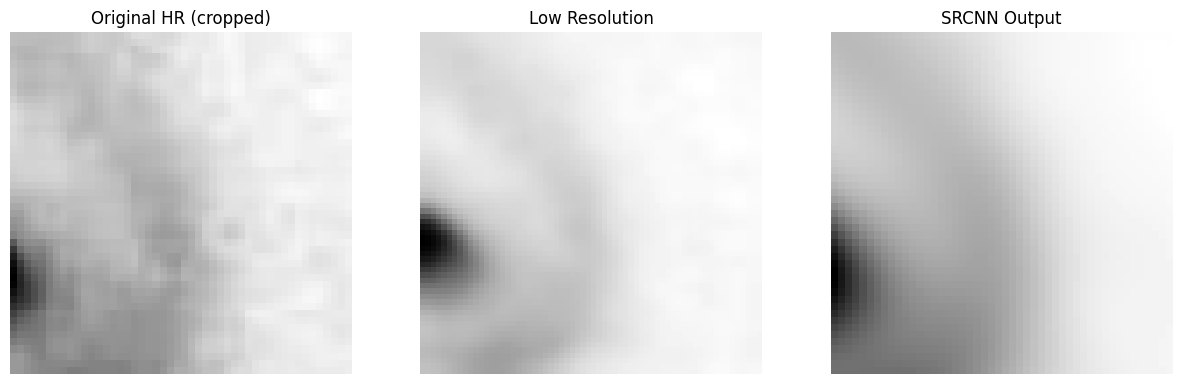


=== Average Metrics on Set5 ===
Average PSNR: 12.46
Average SSIM: 0.3894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
baby_sub9_x2_GT.png | PSNR: 26.39 | SSIM: 0.9031


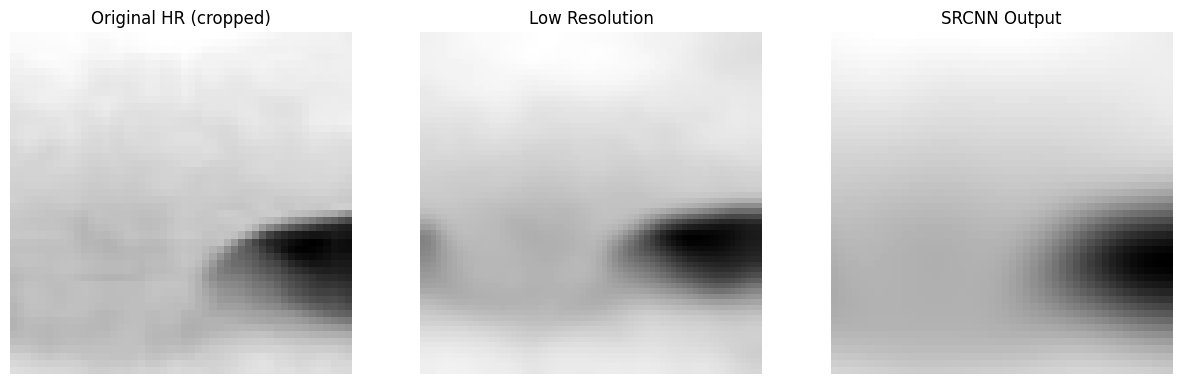


=== Average Metrics on Set5 ===
Average PSNR: 13.32
Average SSIM: 0.4186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
bird_sub0_x2_GT.png | PSNR: 19.53 | SSIM: 0.3364


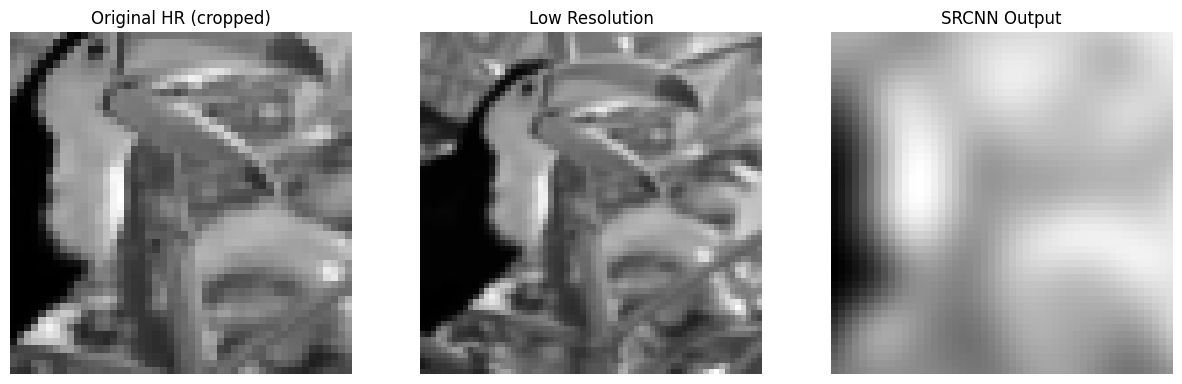


=== Average Metrics on Set5 ===
Average PSNR: 13.95
Average SSIM: 0.4294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
bird_sub1_x2_GT.png | PSNR: 20.06 | SSIM: 0.5048


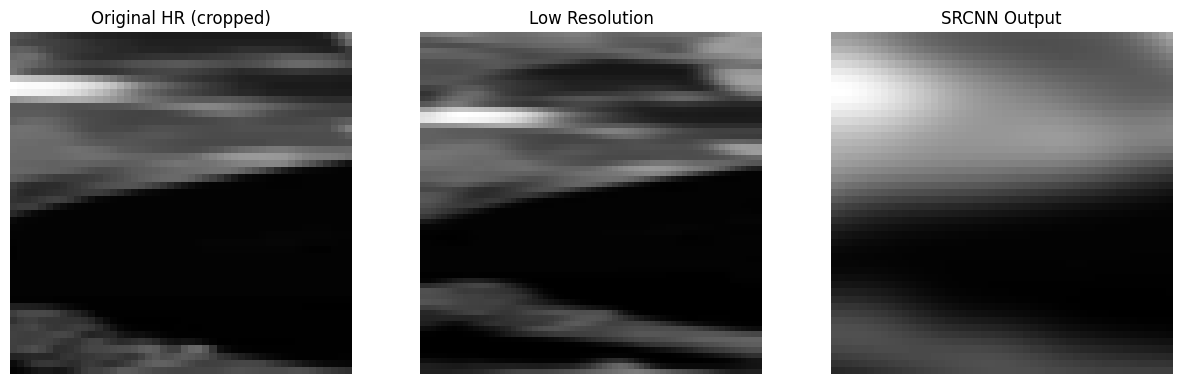


=== Average Metrics on Set5 ===
Average PSNR: 14.59
Average SSIM: 0.4457
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
bird_sub2_x2_GT.png | PSNR: 20.84 | SSIM: 0.5482


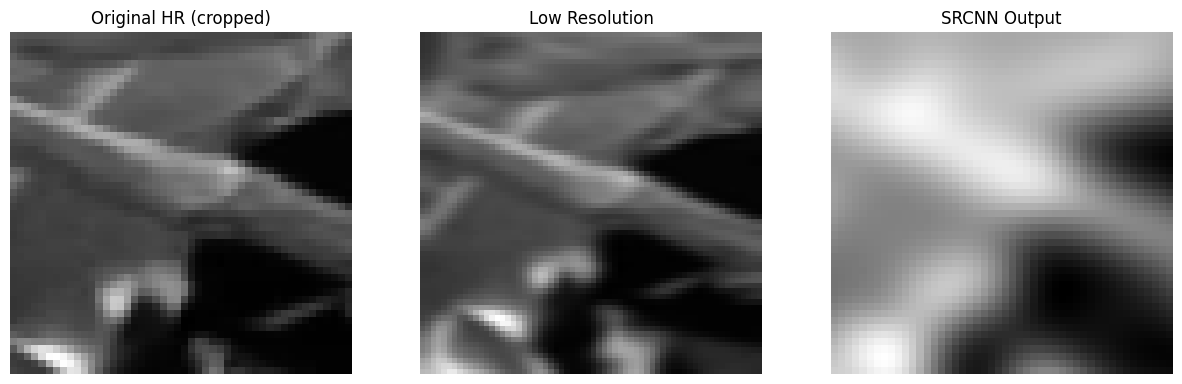


=== Average Metrics on Set5 ===
Average PSNR: 15.26
Average SSIM: 0.4634
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
bird_sub3_x2_GT.png | PSNR: 22.45 | SSIM: 0.6290


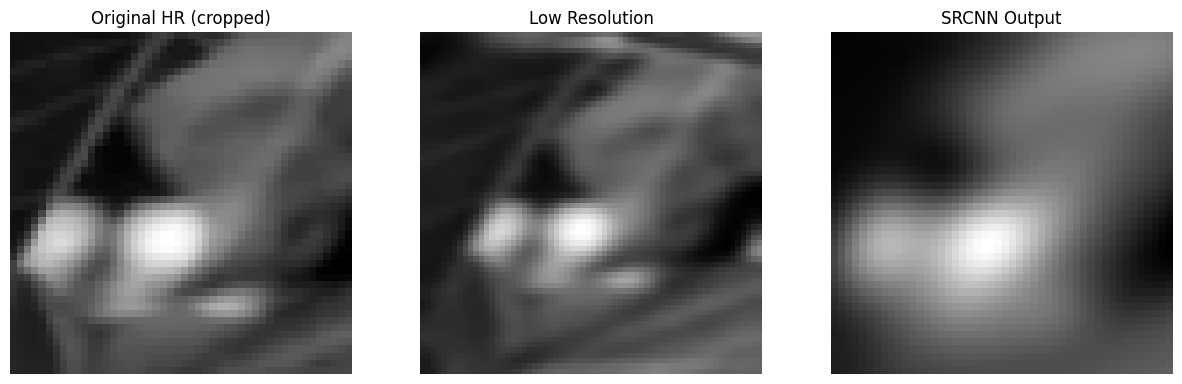


=== Average Metrics on Set5 ===
Average PSNR: 15.99
Average SSIM: 0.4837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
butterfly_sub0_x2_GT.png | PSNR: 16.48 | SSIM: 0.2504


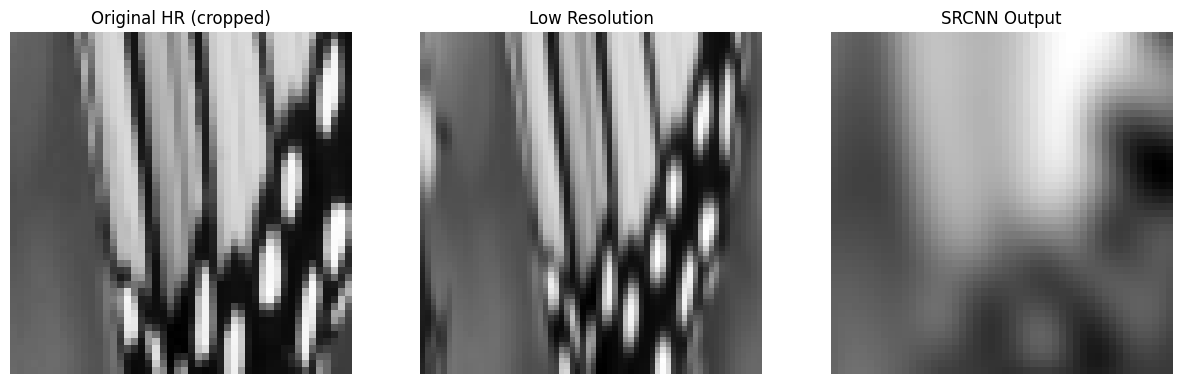


=== Average Metrics on Set5 ===
Average PSNR: 16.52
Average SSIM: 0.4918
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
butterfly_sub1_x2_GT.png | PSNR: 15.47 | SSIM: 0.1536


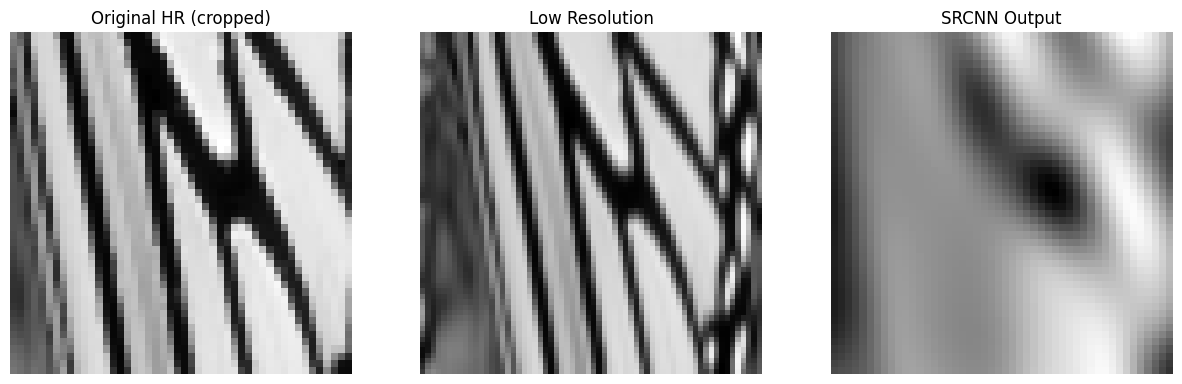


=== Average Metrics on Set5 ===
Average PSNR: 17.02
Average SSIM: 0.4967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
butterfly_sub2_x2_GT.png | PSNR: 15.51 | SSIM: 0.3712


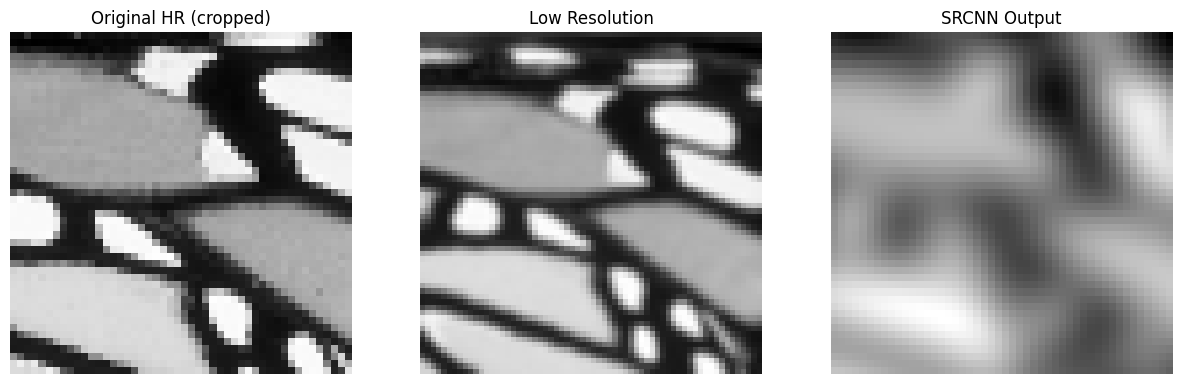


=== Average Metrics on Set5 ===
Average PSNR: 17.52
Average SSIM: 0.5087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
butterfly_sub3_x2_GT.png | PSNR: 15.36 | SSIM: 0.2880


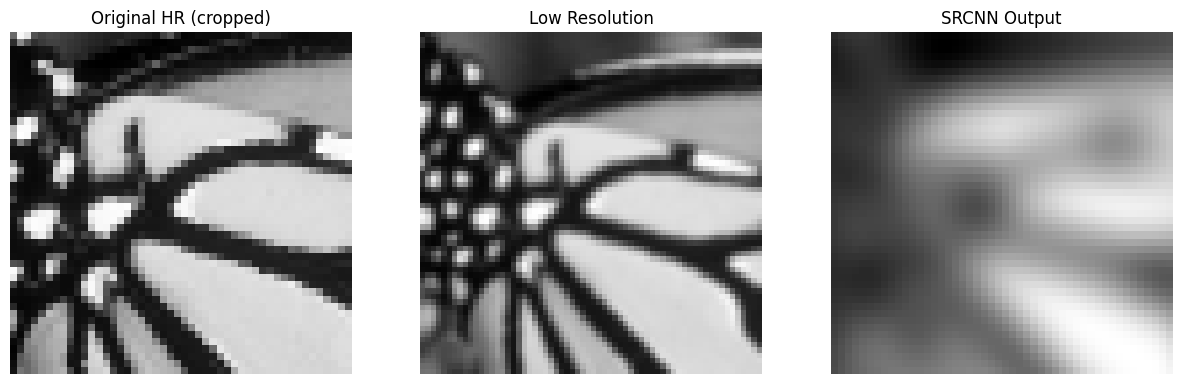


=== Average Metrics on Set5 ===
Average PSNR: 18.02
Average SSIM: 0.5180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
head_sub0_x2_GT.png | PSNR: 23.50 | SSIM: 0.8162


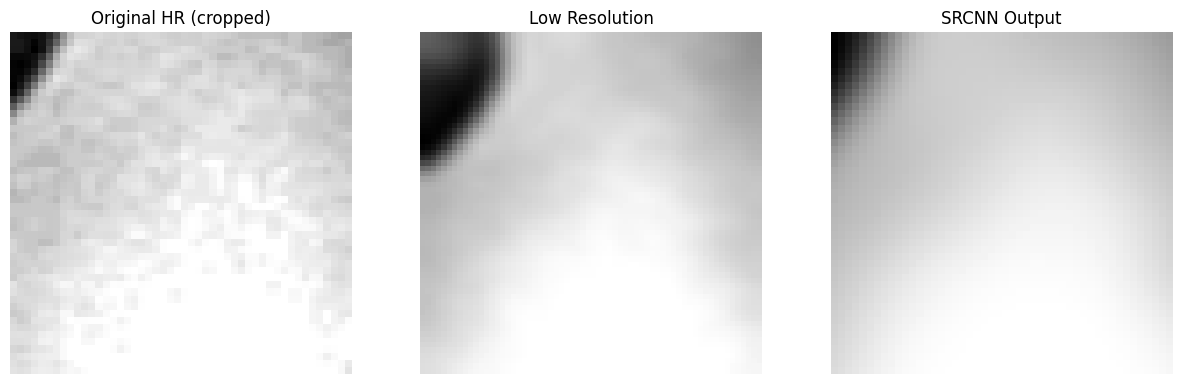


=== Average Metrics on Set5 ===
Average PSNR: 18.77
Average SSIM: 0.5443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
head_sub1_x2_GT.png | PSNR: 27.10 | SSIM: 0.9174


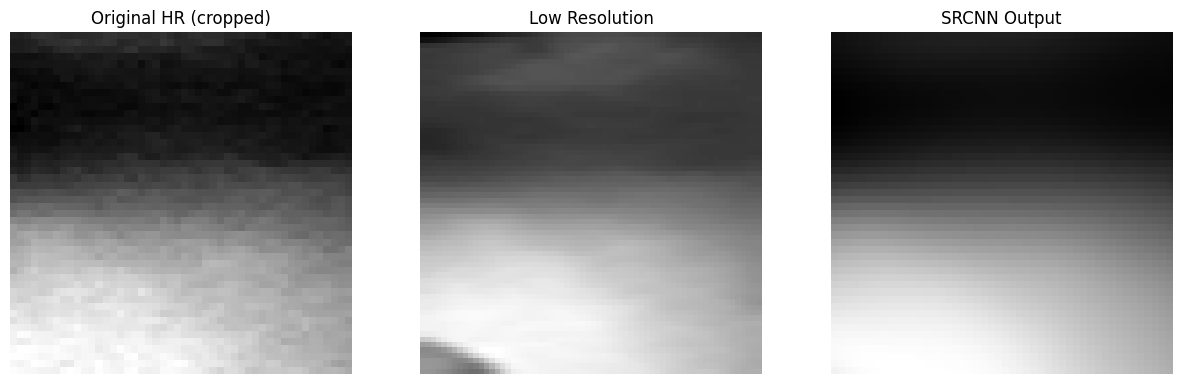


=== Average Metrics on Set5 ===
Average PSNR: 19.65
Average SSIM: 0.5739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
head_sub2_x2_GT.png | PSNR: 22.10 | SSIM: 0.6269


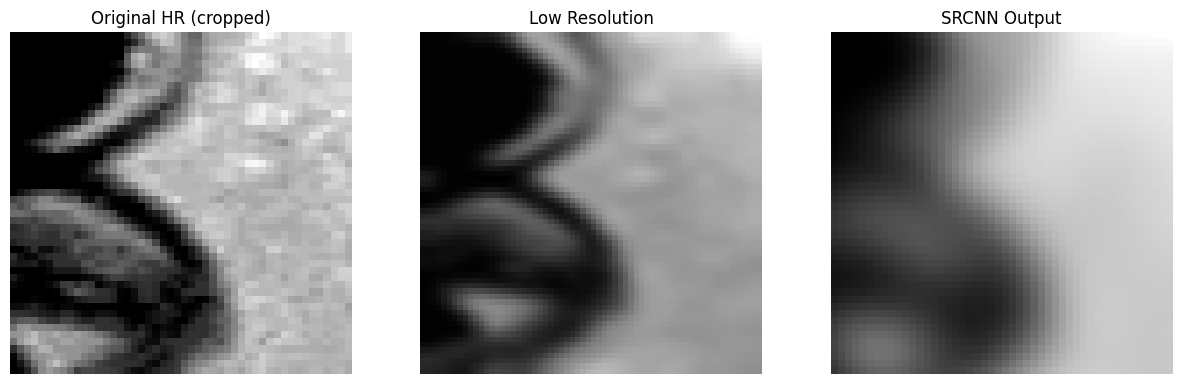


=== Average Metrics on Set5 ===
Average PSNR: 20.36
Average SSIM: 0.5941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
head_sub3_x2_GT.png | PSNR: 22.04 | SSIM: 0.6518


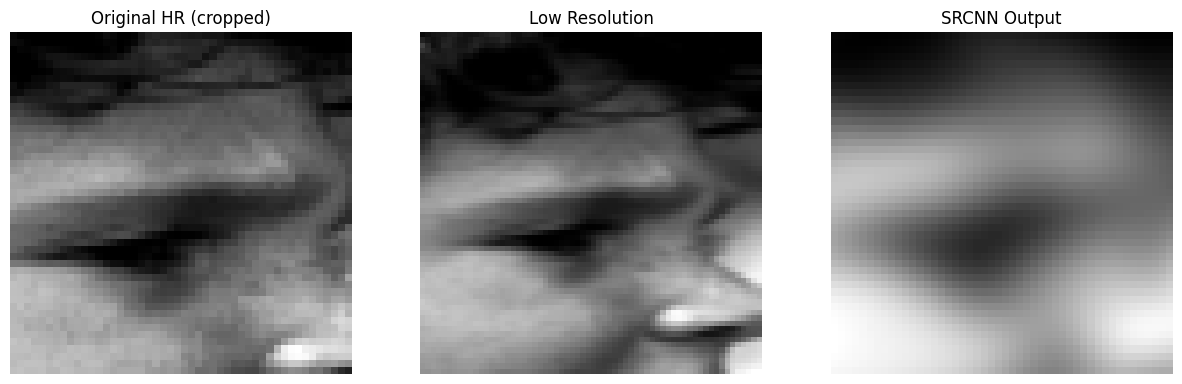


=== Average Metrics on Set5 ===
Average PSNR: 21.07
Average SSIM: 0.6151
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
head_sub4_x2_GT.png | PSNR: 21.19 | SSIM: 0.6030


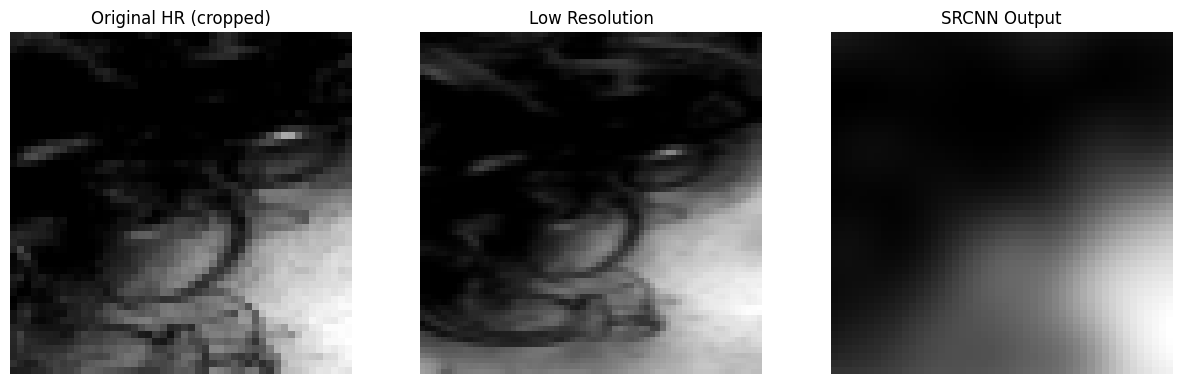


=== Average Metrics on Set5 ===
Average PSNR: 21.76
Average SSIM: 0.6346
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
woman_sub0_x2_GT.png | PSNR: 17.39 | SSIM: 0.4061


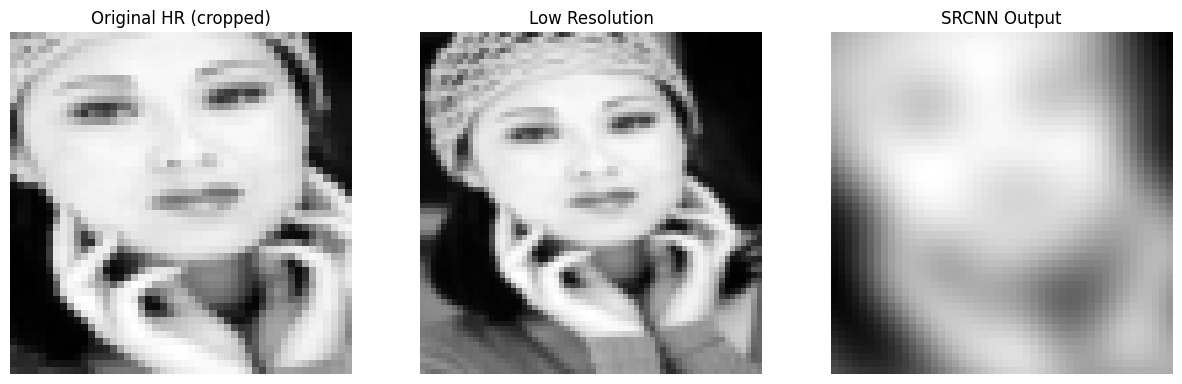


=== Average Metrics on Set5 ===
Average PSNR: 22.32
Average SSIM: 0.6477


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

# ساخت مدل SRCNN با padding='valid' و مقداردهی اولیه خاص
conv1 = layers.Conv2D(64, (9, 9), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv1')

conv2 = layers.Conv2D(32, (5, 5), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv2')

conv3 = layers.Conv2D(1, (5, 5), activation='linear', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv3')

inputs = layers.Input(shape=(target_size[0], target_size[1], 1))
x = conv1(inputs)
x = conv2(x)
outputs = conv3(x)
model = models.Model(inputs, outputs)

# تنظیمات یادگیری مجزا
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')

# فریز موقت لایه‌ی آخر (warm-up)
model.get_layer('conv3').trainable = False

# آموزش اولیه فقط با دو لایه اول
model.fit(x_train, y_train, batch_size=4, epochs=50, verbose=2)

# فعال‌سازی مجدد لایه سوم
model.get_layer('conv3').trainable = True

# تعریف optimizer با نرخ یادگیری کمتر برای کل مدل
optimizer_fine = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(optimizer=optimizer_fine, loss='mse')

# آموزش نهایی مدل
model.fit(x_train, y_train, batch_size=4, epochs=150, verbose=2)


# تست مدل با استفاده از مجموعه Set5 (تصاویر رنگی)
test_hr_path = '/content/drive/MyDrive/basicCNN/test_set5_images/GT/x2'
test_lr_path = '/content/drive/MyDrive/basicCNN/test_set5_images/LR/x2'

hr_test_files = sorted(glob(os.path.join(test_hr_path, '*')))
lr_test_files = sorted(glob(os.path.join(test_lr_path, '*')))

psnr_total = 0
ssim_total = 0
count = len(hr_test_files)

for hr_path, lr_path in zip(hr_test_files, lr_test_files):
    # بارگذاری تصویر رنگی
    hr_img = io.imread(hr_path)
    lr_img = io.imread(lr_path)

    # تبدیل به YCbCr
    hr_ycbcr = color.rgb2ycbcr(hr_img).astype(np.float32)
    lr_ycbcr = color.rgb2ycbcr(lr_img).astype(np.float32)

    # جدا کردن کانال Y
    hr_y = hr_ycbcr[:, :, 0] / 255.0
    lr_y = lr_ycbcr[:, :, 0] / 255.0

    # resize (تطبیق با اندازه مدل)
    lr_y_resized = resize(lr_y, target_size, anti_aliasing=True)
    input_lr = np.expand_dims(np.expand_dims(lr_y_resized, axis=0), axis=-1)

    # پیش‌بینی با مدل
    pred_y = model.predict(input_lr)[0, ..., 0]

    # تطبیق اندازه با HR اصلی برای ارزیابی
    crop = 8
    hr_y_cropped = resize(hr_y, target_size, anti_aliasing=True)[crop:-crop, crop:-crop]

    # PSNR و SSIM برای کانال Y (مبنای اصلی ارزیابی در super-resolution)
    psnr_val = psnr(hr_y_cropped, pred_y, data_range=1.0)
    ssim_val = ssim(hr_y_cropped, pred_y, data_range=1.0)

    psnr_total += psnr_val
    ssim_total += ssim_val

    print(f"{os.path.basename(hr_path)} | PSNR: {psnr_val:.2f} | SSIM: {ssim_val:.4f}")


    # نمایش نتایج
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original HR (cropped)')
    plt.imshow(hr_y_cropped, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Low Resolution')
    plt.imshow(input_lr[0, ..., 0], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('SRCNN Output')
    plt.imshow(pred_y, cmap='gray')
    plt.axis('off')

    plt.show()

    # میانگین نتایج
    print("\n=== Average Metrics on Set5 ===")
    print(f"Average PSNR: {psnr_total / count:.2f}")
    print(f"Average SSIM: {ssim_total / count:.4f}")


در سلول های زیر، در پیش پردازش عکس های تست، عکس ها به چند قسمت تقسیم نشدن

In [1]:
cd /content/drive/MyDrive/basicCNN/

/content/drive/MyDrive/basicCNN


In [ ]:
import os
from PIL import Image, ImageFilter

# --- تنظیمات ---
INPUT_DIR = "Set5"  # مسیر تصاویر اصلی
OUTPUT_GT_BASE_DIR = "test_set5_images/GT"
OUTPUT_LR_BASE_DIR = "test_set5_images/LR"
SCALES = [2, 3, 4]

# --- اطمینان از وجود پوشه‌های خروجی ---
for scale in SCALES:
    os.makedirs(os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}"), exist_ok=True)
    os.makedirs(os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}"), exist_ok=True)

# --- پردازش یک تصویر کامل برای مقیاس‌های مختلف ---
def process_full_image(image, scales=[2, 3, 4], sigma_factor=0.5):
    results = []
    w, h = image.size

    for scale in scales:
        new_w = (w // scale) * scale
        new_h = (h // scale) * scale

        if new_w < scale or new_h < scale:
            continue

        cropped = image.crop((0, 0, new_w, new_h))
        sigma = sigma_factor * scale
        blurred = cropped.filter(ImageFilter.GaussianBlur(sigma))
        downsampled = blurred.resize((new_w // scale, new_h // scale), Image.BICUBIC)
        upscaled = downsampled.resize((new_w, new_h), Image.BICUBIC)

        results.append((scale, cropped, upscaled))  # GT = cropped, LR = upscaled

    return results

# --- اجرای اصلی ---
def main():
    image_files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(image_files)
    counter = 0

    for filename in image_files:
        image_path = os.path.join(INPUT_DIR, filename)
        try:
            image = Image.open(image_path).convert("RGB")
        except Exception as e:
            print(f"خطا در باز کردن تصویر {filename}: {e}")
            continue

        results = process_full_image(image, SCALES)

        for scale, gt_img, lr_img in results:
            base_name = f"{os.path.splitext(filename)[0]}_x{scale}"

            # ذخیره GT
            gt_dir = os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}")
            gt_img.save(os.path.join(gt_dir, f"{base_name}_GT.png"))

            # ذخیره LR
            lr_dir = os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}")
            lr_img.save(os.path.join(lr_dir, f"{base_name}_LR.png"))

            counter += 1

    print(f"\n✅ پردازش کامل شد. {counter} نمونه ذخیره شد.")

if __name__ == "__main__":
    main()


['baby.png', 'bird.png', 'head.png', 'woman.png', 'butterfly.png']

✅ پردازش کامل شد. 15 نمونه ذخیره شد.


Epoch 1/50
133/133 - 2s - 13ms/step - loss: 0.2735
Epoch 2/50
133/133 - 0s - 4ms/step - loss: 0.2735
Epoch 3/50
133/133 - 0s - 3ms/step - loss: 0.2735
Epoch 4/50
133/133 - 0s - 3ms/step - loss: 0.2734
Epoch 5/50
133/133 - 1s - 5ms/step - loss: 0.2734
Epoch 6/50
133/133 - 0s - 3ms/step - loss: 0.2734
Epoch 7/50
133/133 - 1s - 5ms/step - loss: 0.2733
Epoch 8/50
133/133 - 0s - 3ms/step - loss: 0.2733
Epoch 9/50
133/133 - 0s - 3ms/step - loss: 0.2733
Epoch 10/50
133/133 - 0s - 3ms/step - loss: 0.2733
Epoch 11/50
133/133 - 0s - 3ms/step - loss: 0.2732
Epoch 12/50
133/133 - 0s - 3ms/step - loss: 0.2732
Epoch 13/50
133/133 - 0s - 3ms/step - loss: 0.2732
Epoch 14/50
133/133 - 0s - 3ms/step - loss: 0.2731
Epoch 15/50
133/133 - 1s - 5ms/step - loss: 0.2731
Epoch 16/50
133/133 - 0s - 3ms/step - loss: 0.2731
Epoch 17/50
133/133 - 1s - 5ms/step - loss: 0.2730
Epoch 18/50
133/133 - 0s - 3ms/step - loss: 0.2730
Epoch 19/50
133/133 - 1s - 5ms/step - loss: 0.2730
Epoch 20/50
133/133 - 1s - 5ms/step - l

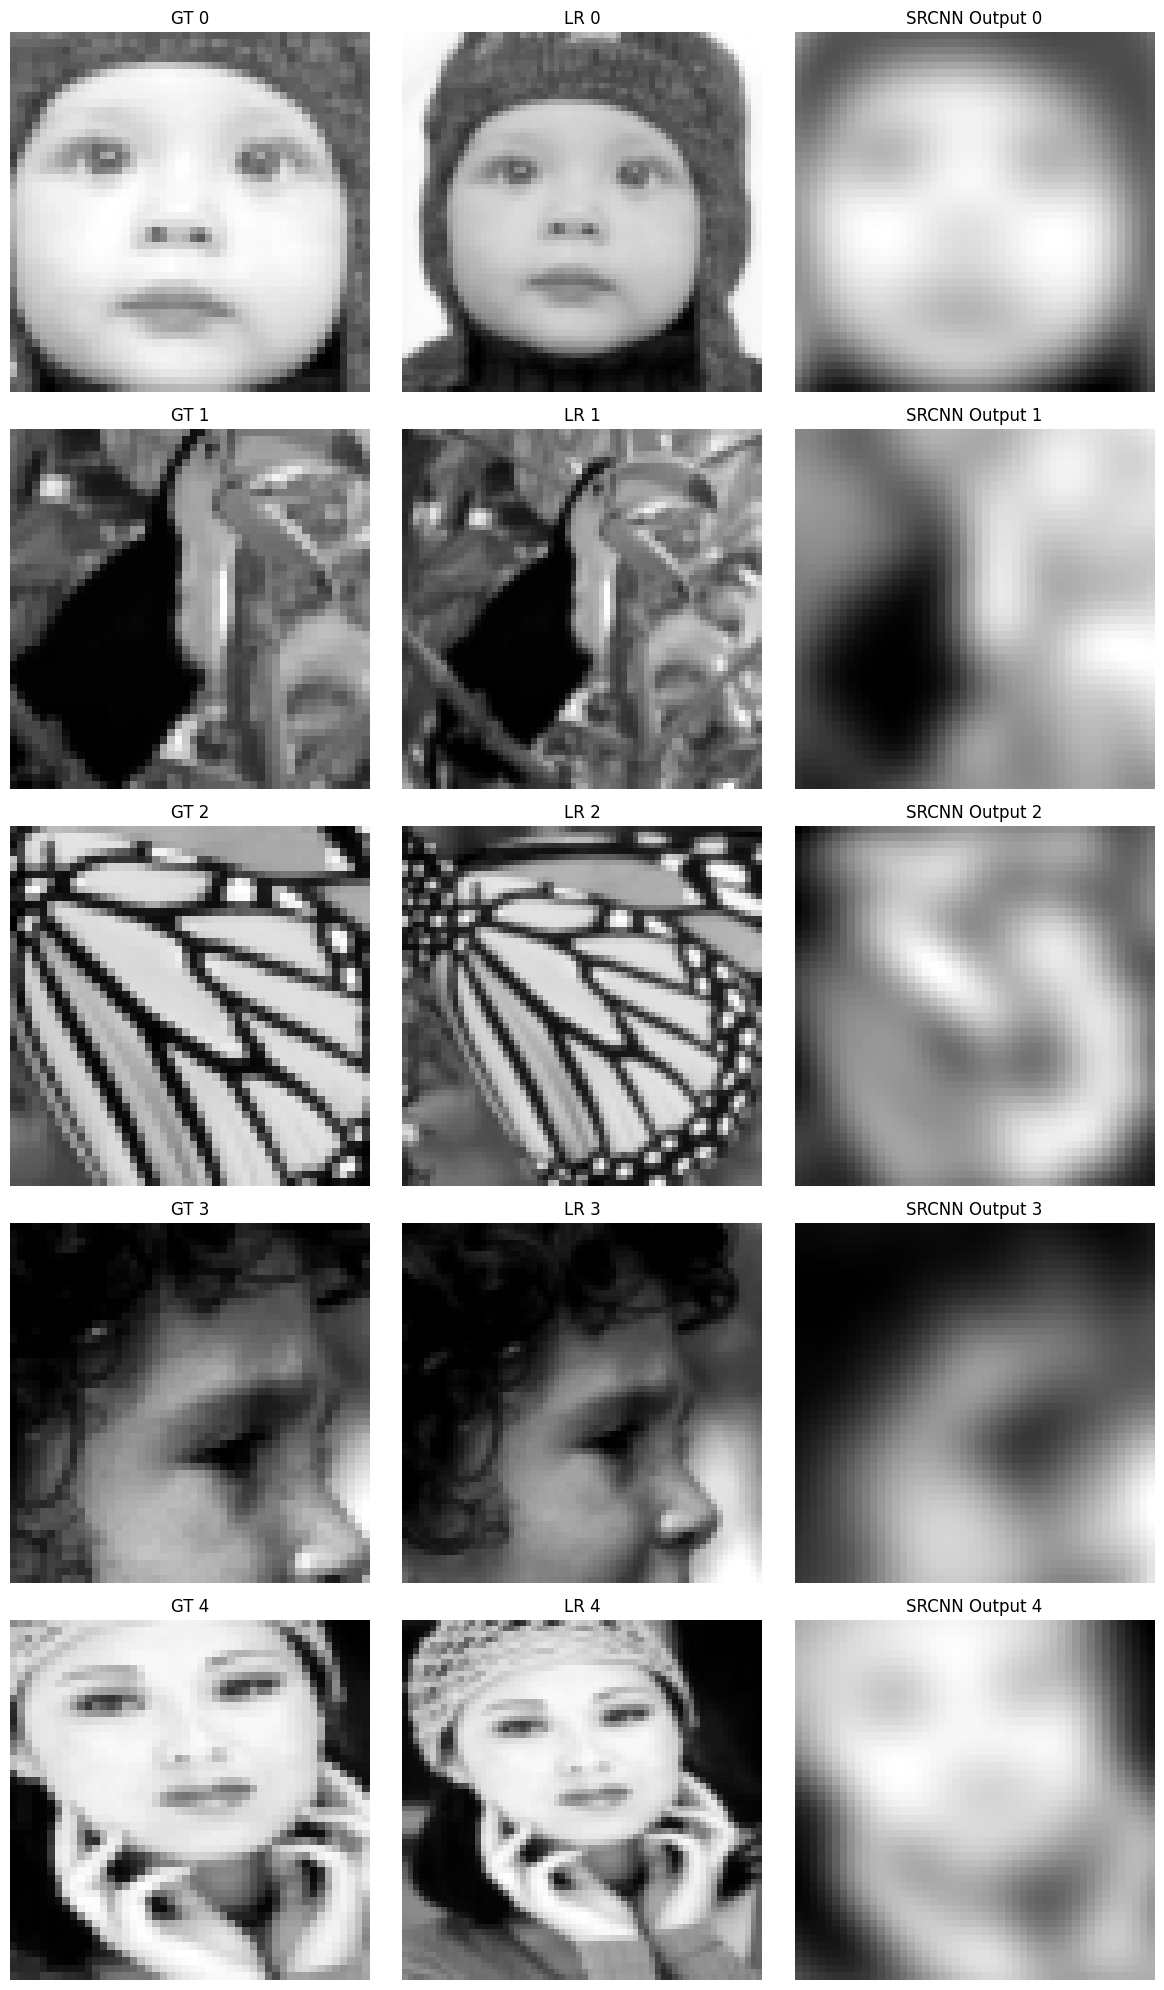

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# -------------------------------
# بارگذاری جفت تصاویر HR و LR
# -------------------------------

def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # crop
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)
    y = np.expand_dims(np.array(y), -1)
    return x, y

# -------------------------------
# مسیر دیتاست آموزشی
# -------------------------------

dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# -------------------------------
# پارامترها
# -------------------------------

target_size = (64, 64)
crop = 8

# -------------------------------
# بارگذاری داده آموزشی
# -------------------------------

x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# -------------------------------
# ساخت مدل SRCNN
# -------------------------------

conv1 = layers.Conv2D(64, (9, 9), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv1')

conv2 = layers.Conv2D(32, (5, 5), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv2')

conv3 = layers.Conv2D(1, (5, 5), activation='linear', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv3')

inputs = layers.Input(shape=(target_size[0], target_size[1], 1))
x = conv1(inputs)
x = conv2(x)
outputs = conv3(x)

model = models.Model(inputs, outputs)

# -------------------------------
# آموزش مدل - فاز اول (بدون conv3)
# -------------------------------

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')
model.get_layer('conv3').trainable = False
model.fit(x_train, y_train, batch_size=4, epochs=50, verbose=2)

# -------------------------------
# آموزش مدل - فاز دوم (همه لایه‌ها)
# -------------------------------

model.get_layer('conv3').trainable = True
optimizer_fine = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(optimizer=optimizer_fine, loss='mse')
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)

# -------------------------------
# تست مدل روی تصاویر Set5
# -------------------------------

def load_test_set(hr_dir, lr_dir, crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*.png')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*.png')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # Resize both LR and HR images to the same target size
        hr_y_resized = resize(hr_y, (64, 64), anti_aliasing=True)
        lr_y_resized = resize(lr_y, (64, 64), anti_aliasing=True)

        cropped = hr_y_resized[crop:-crop, crop:-crop]

        x.append(np.expand_dims(lr_y_resized, -1))
        y.append(np.expand_dims(cropped, -1))

    return np.array(x), np.array(y)


# -------------------------------
# مسیر تست Set5
# -------------------------------

test_base = 'test_set5_images'
scale = 2
test_hr_path = os.path.join(test_base, f'GT/x{scale}')
test_lr_path = os.path.join(test_base, f'LR/x{scale}')

x_test, y_test = load_test_set(test_hr_path, test_lr_path, crop=8)

# -------------------------------
# ارزیابی کلی روی کل مجموعه تست
# -------------------------------

psnr_total, ssim_total = 0, 0
for i in range(len(x_test)):
    pred = model.predict(np.expand_dims(x_test[i], axis=0))[0, ..., 0]
    gt = y_test[i, ..., 0]

    psnr_total += psnr(gt, pred, data_range=1.0)
    ssim_total += ssim(gt, pred, data_range=1.0)
    print(psnr_total)

mean_psnr = psnr_total / len(x_test)
mean_ssim = ssim_total / len(x_test)

print(f"\n📊 میانگین PSNR روی تست: {mean_psnr:.2f}")
print(f"📊 میانگین SSIM روی تست: {mean_ssim:.4f}")

# -------------------------------
# نمایش همه تصاویر تست
# -------------------------------

num_samples = len(x_test)
cols = 3  # GT | LR | Output
rows = num_samples

plt.figure(figsize=(12, 4 * rows))

for i in range(num_samples):
    pred = model.predict(np.expand_dims(x_test[i], axis=0))[0, ..., 0]
    gt = y_test[i, ..., 0]
    lr = x_test[i, ..., 0]

    # GT
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(gt, cmap='gray')
    plt.title(f'GT {i}')
    plt.axis('off')

    # LR
    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(lr, cmap='gray')
    plt.title(f'LR {i}')
    plt.axis('off')

    # Output
    plt.subplot(rows, cols, i * cols + 3)
    plt.imshow(pred, cmap='gray')
    plt.title(f'SRCNN Output {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()
